# (1) Load Data

In [4]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [5]:
df_X = diabetes.data
df_y = diabetes.target

In [6]:
df_X.shape, df_y.shape

((442, 10), (442,))

# (2) Prepare X

In [7]:
df_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [8]:
# 이미 numpy array인데?

# (3) Prepare y

In [9]:
df_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [10]:
# 이미 numpy array인데?

# (4) split train, test

In [11]:
from sklearn.model_selection import train_test_split

In [81]:
tr_X, ts_X, tr_y, ts_y = train_test_split(df_X, df_y, test_size=0.23)

# (5) Prepare Model

In [13]:
import numpy as np

W = np.random.rand(df_X.shape[1])
b = np.random.rand(1)

W.shape, b.shape

((10,), (1,))

In [14]:
def model(X, W, b):
    predictions = 0
    for i in range(W.shape[0]):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [15]:
model(df_X, W, b).shape

(442,)

# (6) Define loss func

In [16]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [17]:
MSE(model(df_X, W, b), df_y)

28833.82415225769

# (7) Define gradient func

In [18]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [19]:
dW, db = gradient(df_X, W, b, df_y)
dW.shape, db.shape

((10,), ())

# (8) Set hyperparameter

In [20]:
LEARNING_RATE = 0.001

# (9) Train model

In [22]:
tr_X.shape

(331, 10)

In [23]:
tr_y.shape

(331,)

In [24]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [25]:
N = len(tr_y)
    
# y_pred 준비
y_pred = model(tr_X, W, b)

# 공식에 맞게 gradient 계산
dW = 1/N * 2 * tr_X.T.dot(y_pred - tr_y)

# b의 gradient 계산
db = 2 * (y_pred - tr_y).mean()

In [26]:
y_pred.shape

(331,)

In [89]:
tr_X, ts_X, tr_y, ts_y = train_test_split(df_X, df_y, test_size=0.23)

LEARNING_RATE = 0.5

losses = []

W = np.random.rand(df_X.shape[1])
b = np.random.rand(1)

for i in range(1, 10000):
    dW, db = gradient(tr_X, W, b, tr_y)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(tr_X, W, b, tr_y)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 2998.6444
Iteration 2000 : Loss 2981.0638
Iteration 3000 : Loss 2978.9694
Iteration 4000 : Loss 2977.6684
Iteration 5000 : Loss 2976.4919
Iteration 6000 : Loss 2975.3738
Iteration 7000 : Loss 2974.3028
Iteration 8000 : Loss 2973.2747
Iteration 9000 : Loss 2972.2866


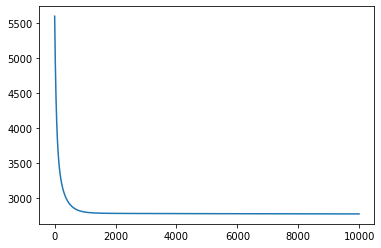

In [79]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

# (10) test 데이터에 대한 성능 확인하기

In [86]:
predictions = model(ts_X, W, b)
L = MSE(predictions, ts_y)
L

2664.7945115147345

# (11) 정답 데이터와 예측한 데이터 시각화하기

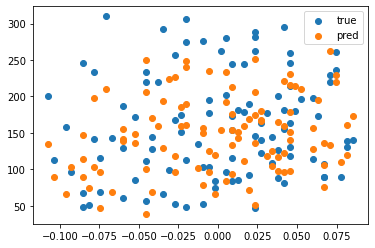

In [87]:
plt.scatter(ts_X[:, 0], ts_y, label='true')
plt.scatter(ts_X[:, 0], predictions, label='pred')
plt.legend()
plt.show()